In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import statsmodels
import scipy  
from scipy import stats

In [5]:
def shapirotest_and_paint(samples):
    # Kiểm tra  phân phối chuẩn của diet_type_? (loại ?) 
    from scipy.stats import shapiro
    statistics_diet, pvalue_diet = shapiro(samples)
    print('statistics = ',statistics_diet)
    print('pvalue = ',pvalue_diet)
    if pvalue_diet > .05:
        print('Không thể bác bỏ giả thiết H0: Phân phối của dữ liệu là chuẩn')
        print('Đủ điều kiện để phân tích tiếp')
    else:
        print('Dữ liệu không tuân theo luật phân phối chuẩn')
    print('thống kê ')
    # ddof=1 : hiệu chỉnh
    plt.plot(np.linspace(np.min(samples), np.max(samples)), 
            stats.norm.pdf(np.linspace(np.min(samples), np.max(samples)), 
                            np.mean(samples), 
                            np.std(samples, ddof=1)))
    # density=True : chuẩn hóa dữ liệu về normal
    plt.hist(samples, color='c', edgecolor='red', density=True)
    plt.title(str(samples), fontsize=30)
    plt.show()

In [6]:
df = pd.read_csv("data_new.csv")

In [7]:
df

,Unnamed: 0,Product,Price,Brand,Core,RAM,ScrSize,GraphicCard,Capacity,OperSystem,URL
0,0,"Laptop HP 240 G8 i5 1135G7/8GB/512GB/14.0""HD/W...",17599000,HP,Intel Core i5-1135G7,8,14.0,Intel Iris Xe Graphics,512,Window,https://fptshop.com.vn/may-tinh-xach-tay/hp-24...
1,1,"Laptop HP 240 G8 Pentium N5030/4GB/256GB/14.0""...",10790000,HP,Intel Pentium N5030,4,14.0,Intel UHD Graphics 605,256,Window,https://fptshop.com.vn/may-tinh-xach-tay/hp-24...
2,2,Laptop Asus Vivobook X515EP-BQ189T i5 1135G7/ ...,18599000,Asus,Intel Core i5-1135G7,8,15.6,NVIDIA GeForce MX330 2 GB & Intel Iris Xe Grap...,512,Window,https://fptshop.com.vn/may-tinh-xach-tay/asus-...
3,3,Laptop Acer Travel Mate B3 TMB311-31-C2HB Cele...,9499000,Acer,Intel Celeron N4020,4,11.6,Intel UHD Graphics 605,128,Window,https://fptshop.com.vn/may-tinh-xach-tay/acer-...
4,4,Laptop MSI Modern 15 A5M 234VN R5 5500U/8GB/51...,17499000,MSI,AMD Ryzen 5-5500U,8,15.6,AMD Radeon Graphics,512,Window,https://fptshop.com.vn/may-tinh-xach-tay/msi-m...
...,...,...,...,...,...,...,...,...,...,...,...
281,281,Laptop HP 15s-du1106TU i3 10110U/4GB/512GB SSD...,12890000,HP,Intel Core i3-10110U,4,15.6,Intel UHD Graphics,512,Window,https://fptshop.com.vn/may-tinh-xach-tay/hp-15...
282,282,Laptop Dell Inspiron N3501 i3 1115G4/4GB/256GB...,13899000,Dell,Intel Core i3-1115G4,4,15.6,Intel UHD Graphics,256,Window,https://fptshop.com.vn/may-tinh-xach-tay/dell-...
283,283,Laptop CHUWI GemiBook Pro Celeron N5100/8GB/25...,9299000,Chuwi,Intel Celeron N5100,8,14.0,Intel UHD Graphics,256,Window,https://fptshop.com.vn/may-tinh-xach-tay/chuwi...
284,284,Laptop CHUWI LarkBook Celeron N4120/8GB/256GB/...,9099000,Chuwi,Intel Celeron N4120,8,13.3,Intel UHD Graphics 600,256,Window,https://fptshop.com.vn/may-tinh-xach-tay/chuwi...


In [8]:
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

In [9]:
df['RAM'] = pd.to_numeric(df['RAM'], errors='coerce')

In [10]:
df['ScrSize'] = pd.to_numeric(df['ScrSize'], errors='coerce')

In [11]:
df['Capacity'] = pd.to_numeric(df['Capacity'], errors='coerce')

In [12]:
pr1 = df[['Price','Capacity']][df['Capacity']==512]

In [13]:
pr2 = df[['Price','Capacity']][df['Capacity']==256]

In [14]:
pr1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191 entries, 0 to 281
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     191 non-null    float64
 1   Capacity  191 non-null    float64
dtypes: float64(2)
memory usage: 4.5 KB


In [15]:
pr2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 1 to 285
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     60 non-null     float64
 1   Capacity  60 non-null     float64
dtypes: float64(2)
memory usage: 1.4 KB


Xây dựng giả thuyết:

*   H0: mean(pr1) = mean(pr2)
*   H1: mean(pr1) != mean(pr2)





In [16]:
pr1_ = pr1.sample(60)

In [ ]:
shapirotest_and_paint(pr1_['Price'])

In [ ]:
shapirotest_and_paint(pr2['Price'])

Ở đây không thể tiến hành phân tích anova để xem sét sự ảnh hưởng của Capacity đến Price. Do khung dữ iệu không tuân theo phân phối chuẩn.

In [19]:
br1 = df[['Price','Brand']][df['Brand']=='Asus']

In [20]:
br1.head(10)

,Price,Brand
2,18599000.0,Asus
6,15649000.0,Asus
10,19399000.0,Asus
21,9499000.0,Asus
27,20499000.0,Asus
29,24199000.0,Asus
35,9999000.0,Asus
38,25399000.0,Asus
50,39999000.0,Asus
51,39499000.0,Asus


In [21]:
br1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58 entries, 2 to 276
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   58 non-null     float64
 1   Brand   58 non-null     object 
dtypes: float64(1), object(1)
memory usage: 1.4+ KB


In [22]:
br2 = br1 = df[['Price','Brand']][df['Brand']=='MSI']

In [23]:
br2.head(10)

,Price,Brand
4,17499000.0,MSI
5,14399000.0,MSI
7,19590000.0,MSI
15,27599000.0,MSI
16,27299000.0,MSI
24,27999000.0,MSI
28,18399000.0,MSI
30,20999000.0,MSI
31,19599000.0,MSI
33,16699000.0,MSI


In [24]:
br2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53 entries, 4 to 279
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   53 non-null     float64
 1   Brand   53 non-null     object 
dtypes: float64(1), object(1)
memory usage: 1.2+ KB


Xây dựng giả thuyết:

*   H0: mean(br1) = mean(br2)
*   H1: mean(br1) != mean(br2)


> Giá MSI như thế nào so với Acer




In [25]:
br1_ = br1['Price'].sample(50)
br2_ = br2['Price'].sample(50)

statistics =  0.8527800440788269
pvalue =  1.8414342775940895e-05
Dữ liệu không tuân theo luật phân phối chuẩn
thống kê 


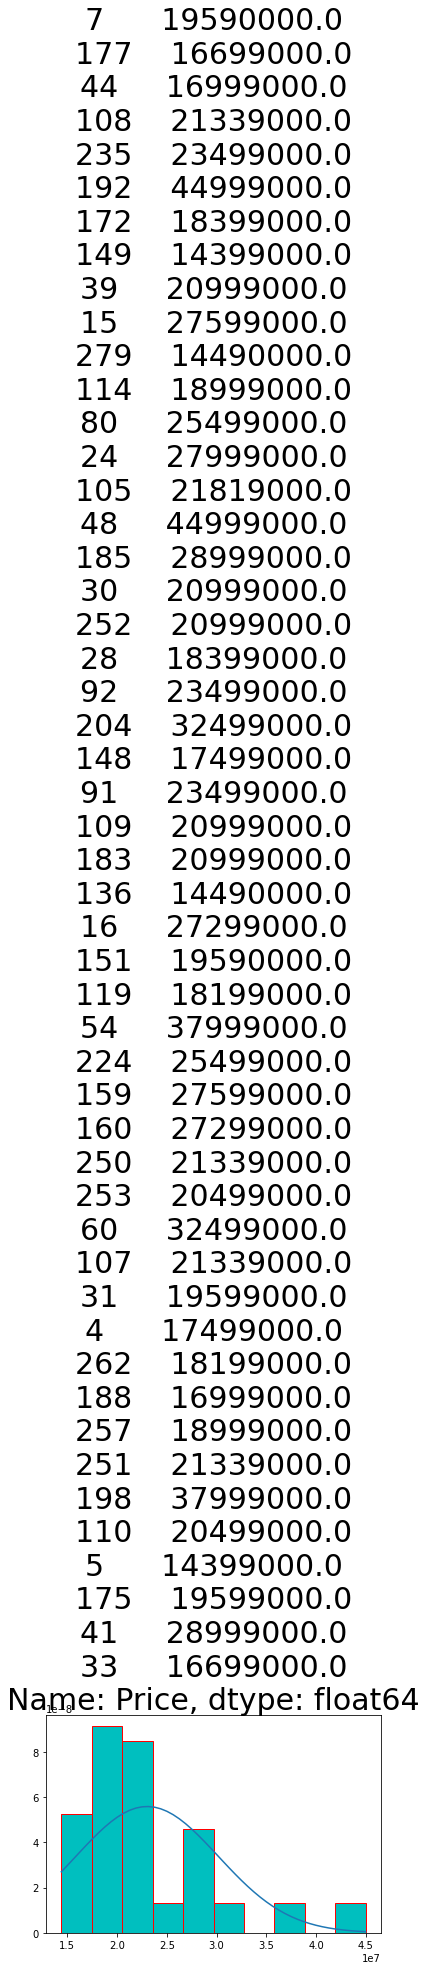

In [26]:
shapirotest_and_paint(br1_)

statistics =  0.8337149024009705
pvalue =  5.7666593420435674e-06
Dữ liệu không tuân theo luật phân phối chuẩn
thống kê 


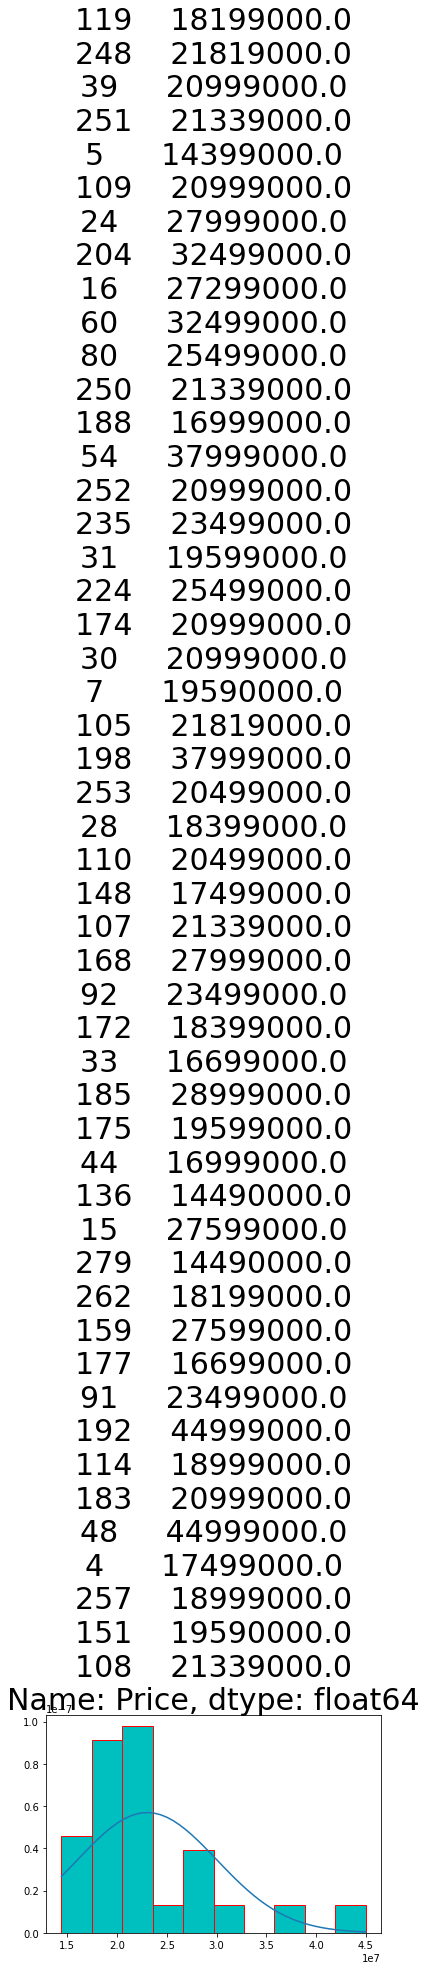

In [27]:
shapirotest_and_paint(br2_)

ở đây có thể thấy dữ liệu của MSI và cả Acer đều không tuân theo phân phối chuẩn, cho nên không thế tiến hành kiểm định Anova.

In [28]:
Pram1 = df[['Price','RAM']][df['RAM']==8]

In [29]:
Pram2 = df[['Price','RAM']][df['RAM']==4]

In [30]:
Pram3 = df[['Price','RAM']][df['RAM']==16]

In [31]:
Pram1_ = Pram1['Price'].sample(30)
Pram2_ = Pram2['Price'].sample(30)
Pram3_ = Pram3['Price'].sample(30)

Xây dựng giả thuyết:

*   H0: mean(Pram1) = mean(Pram2) = mean(Pram3)
*   H1: mean(Pram1) != mean(Pram2) != mean(Pram3)


> Liệu RAM có ảnh hưởng đến trung bình giá sản phẩm.



statistics =  0.9436718821525574
pvalue =  0.11423741281032562
Không thể bác bỏ giả thiết H0: Phân phối của dữ liệu là chuẩn
Đủ điều kiện để phân tích tiếp
thống kê 


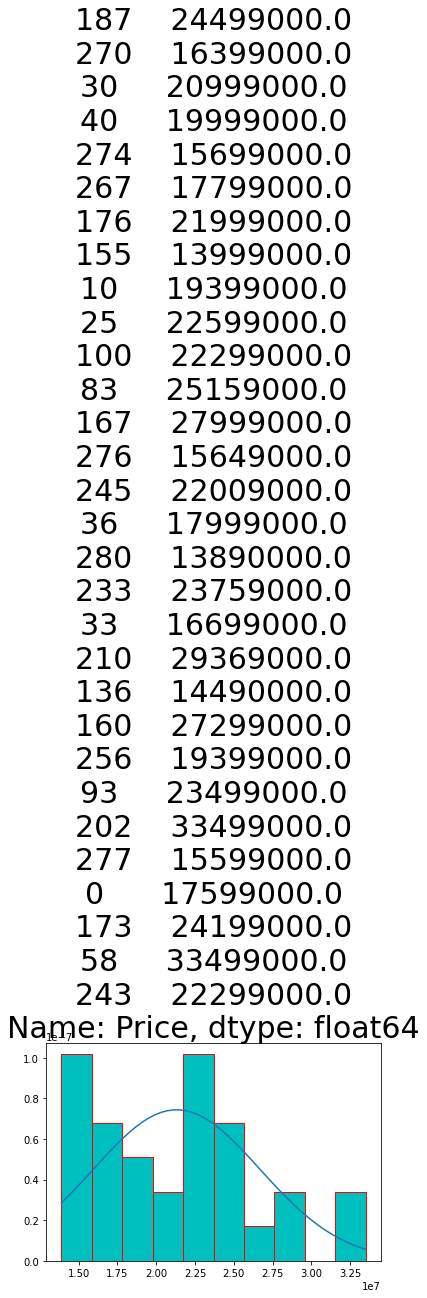

In [32]:
shapirotest_and_paint(Pram1_)

statistics =  0.84721440076828
pvalue =  0.0005424176342785358
Dữ liệu không tuân theo luật phân phối chuẩn
thống kê 


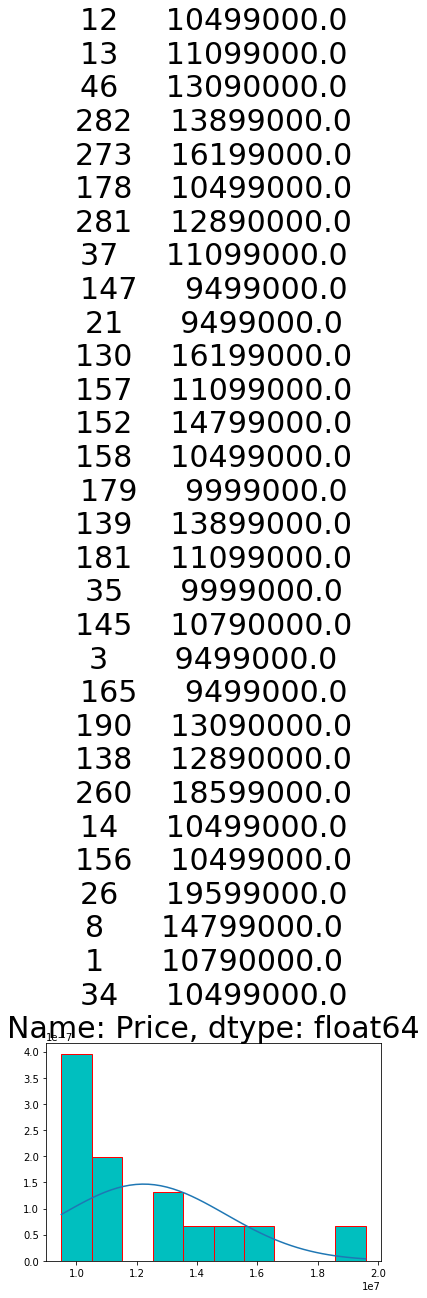

In [33]:
shapirotest_and_paint(Pram2_)

statistics =  0.9189589619636536
pvalue =  0.02520599402487278
Dữ liệu không tuân theo luật phân phối chuẩn
thống kê 


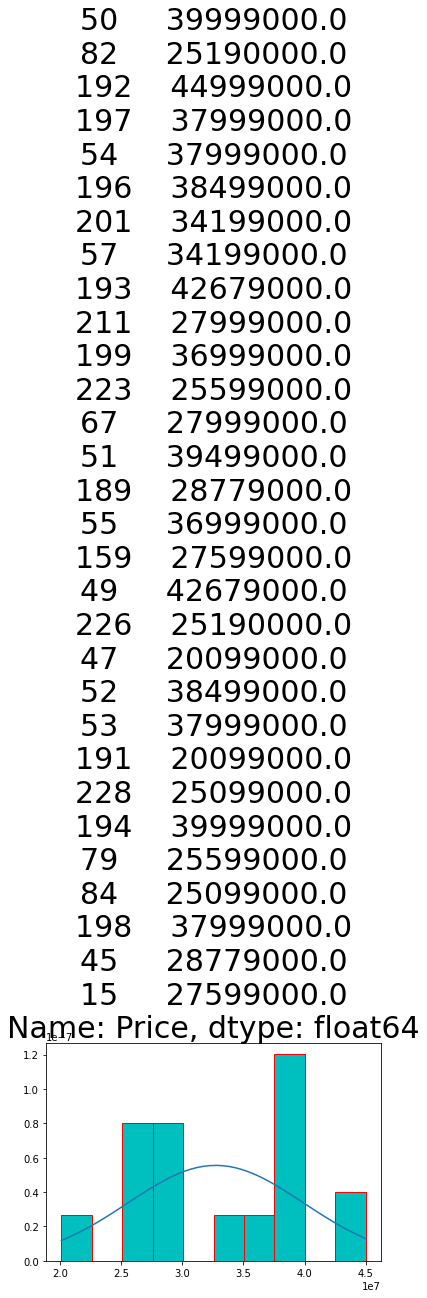

In [34]:
shapirotest_and_paint(Pram3_)

không tuân theo phân phối chuẩn nên không thể phân tích tiếp
